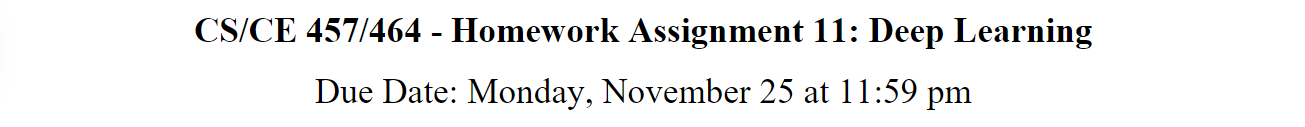

# Muhammad Abdullah - ma07534

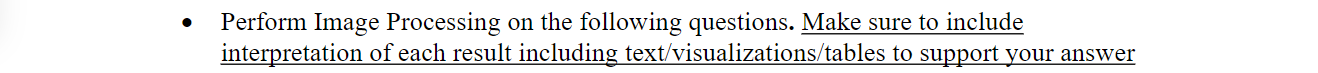

_______________________________________________________________________________________________________________________________________________________________________________________________

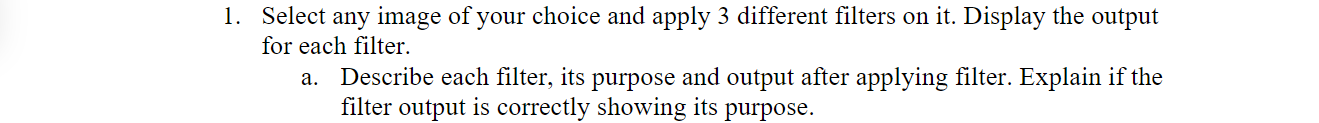

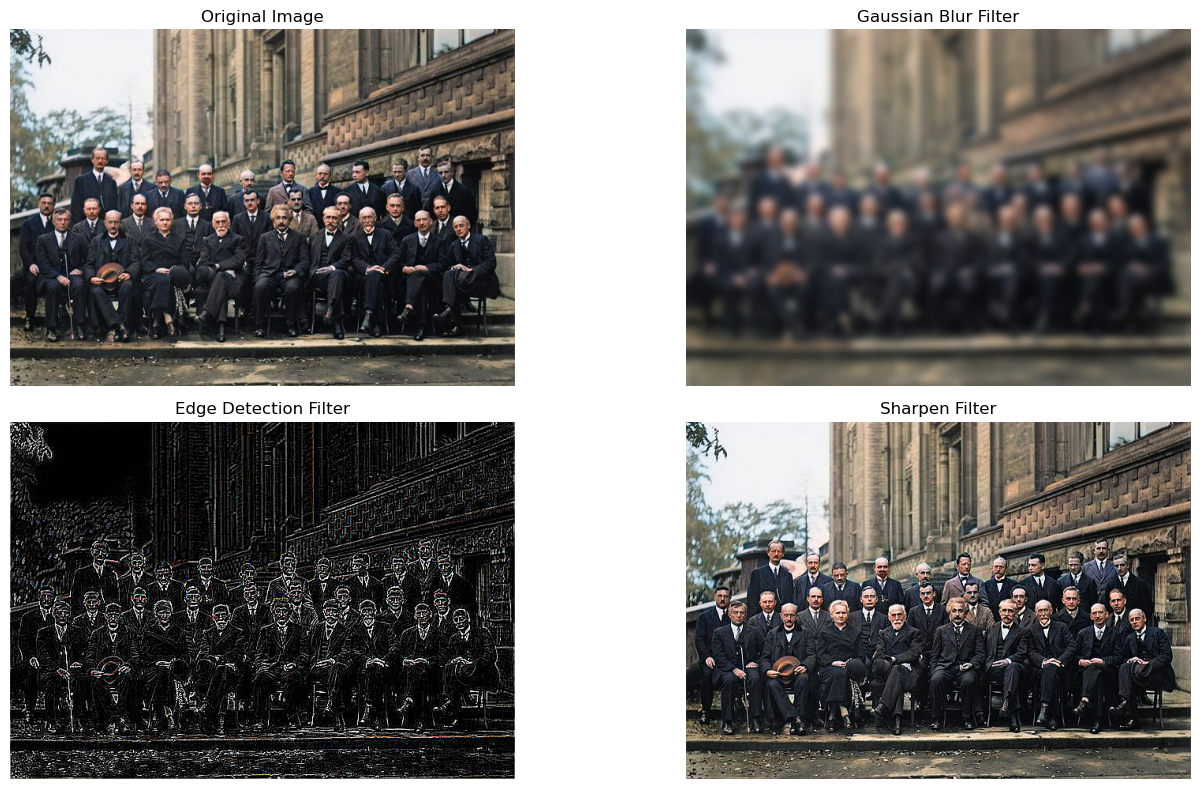

In [34]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

image_path = "Solvay_conference_1927.jpg"  
image = Image.open(image_path)

blurred_image = image.filter(ImageFilter.GaussianBlur(5))

edge_detected_image = image.filter(ImageFilter.FIND_EDGES)

sharpened_image = image.filter(ImageFilter.SHARPEN)

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(blurred_image)
plt.title("Gaussian Blur Filter")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(edge_detected_image)
plt.title("Edge Detection Filter")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(sharpened_image)
plt.title("Sharpen Filter")
plt.axis("off")
plt.tight_layout()
plt.show()

Filter 1: The Gaussian filter is a low-pass filter that reduces high-frequency components. Instead of using the box filter, the image is convolved using a Gaussian filter. We can observe the result of the blurring as well in the image, where we set the radius of the blur to 5, this is also the standard deviation of the Gaussian kernel -- something that is changed for different blur intensities as required.

Filter 2: The FINDEDGES filter will find the edges of parts of the image. We can see the edges quite well, and we can obtain better results with RGBA images.

Filter 3: The SHARPEN filter will sharpen an image, and we can observe our image is well sharpened.

____________________________________________________________________________________________________________________________________________________________________________________________________________

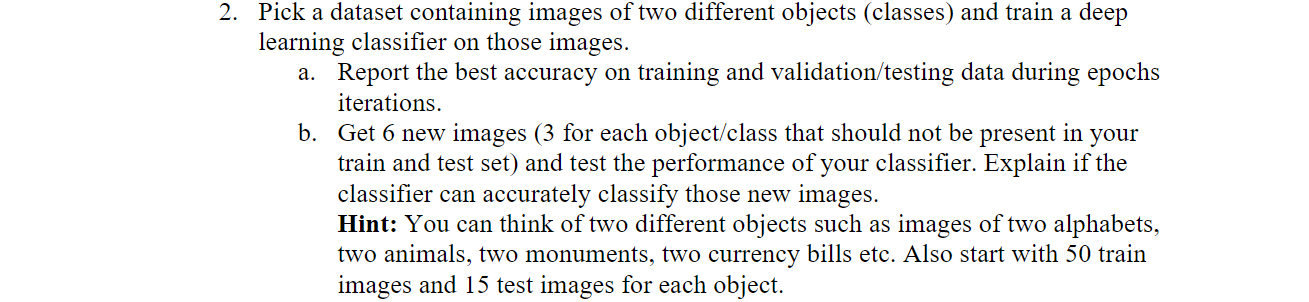

In [35]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

First I will organize my data in a folder output_dir, where I will create two separate folders for training and testing. There I will add the train and test dataset folders. The classes I am training on are the flower and cars class as obtained from the following link: https://www.kaggle.com/datasets/pavansanagapati/images-dataset.

In [36]:
import shutil
from sklearn.model_selection import train_test_split

original_dataset_dir = r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\data"
output_dir = r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\outputDL"

class1 = "cars" 
class2 = "flowers"     

os.makedirs(f"{output_dir}/train/{class1}", exist_ok=True)
os.makedirs(f"{output_dir}/train/{class2}", exist_ok=True)
os.makedirs(f"{output_dir}/test/{class1}", exist_ok=True)
os.makedirs(f"{output_dir}/test/{class2}", exist_ok=True)

def split_and_move(class_name):
    class_dir = os.path.join(original_dataset_dir, class_name)
    images = os.listdir(class_dir)
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), f"{output_dir}/train/{class_name}/{img}")

    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), f"{output_dir}/test/{class_name}/{img}")

split_and_move(class1)
split_and_move(class2)

Once my folders are ready, I can now focus on preparing the data for training and testing. For preprocessing I use the ImageFataGenerator from Keras. I rescale all pixel values in the images to a range of 0-1 by dividing the pixel value by 255. Then I resize all images to a target size of 150, 150 pixels and create batches of 32 images. I do the same with my test data. Then I build a CNN model, compile and save it.

Found 441 images belonging to 2 classes.
Found 189 images belonging to 2 classes.
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5054 - loss: 0.9133 - val_accuracy: 0.5344 - val_loss: 0.6377
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5908 - loss: 0.6512 - val_accuracy: 0.7725 - val_loss: 0.4902
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.8330 - loss: 0.4558 - val_accuracy: 0.8889 - val_loss: 0.2981
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8833 - loss: 0.2912 - val_accuracy: 0.9153 - val_loss: 0.1762
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.

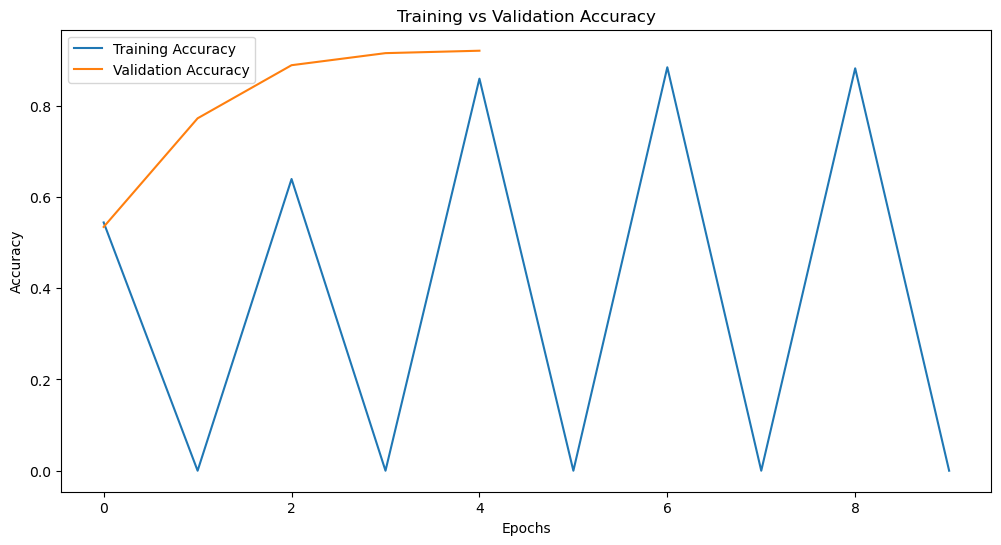

In [37]:
train_dir = r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\outputDL\train"
test_dir = r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\outputDL\test"

train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=180,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=180,
    class_mode='binary'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

model.save("binary_classifier.h5")

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


I train my data over 10 epochs and the accuracy increases with each epoch, starting at 0.62 at first epoch and reaching 0.9861 by the 10th epoch. The fluctuation in training accuracy is indicative of a possible overfitting issue -- the model might not be learning generalized patterns but it might instead be memorizing the training data. I can confirm this in my tests. 

In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model("binary_classifier.h5")

new_images = [
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower1.jpg",  
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower2.jpg",
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower3.jpg",
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar1.jpg",    
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar2.jpg",
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar3.jpg"
]

for img_path in new_images:
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_label = "flowers" if prediction >= 0.5 else "cars"
    print(f"Image: {img_path} - Predicted Class: {class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower1.jpg - Predicted Class: flowers
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower2.jpg - Predicted Class: cars
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower3.jpg - Predicted Class: flowers
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar1.jpg - Predicted Class: flowers
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar2.jpg - Predicted

I initially set the classes as flowers as class 2 and cars as class 1. The results are far from good, it inaccurately identifies 1 car and one flower. I can however fix this using a transfer learning approach with an existing model.

Using Transfer Learning

I use the VGG16 model as my base model because this is a popular image classification model, with its pre trained weights from the ImageNet dataset. Then I combine the base model with a new model on top of it with custom layers. Once this is set up I train it the same way as before. 

Found 441 images belonging to 2 classes.
Found 189 images belonging to 2 classes.
Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 14s/step - accuracy: 0.4695 - loss: 1.0798 - val_accuracy: 0.9947 - val_loss: 0.0973
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 13s/step - accuracy: 0.9671 - loss: 0.1659 - val_accuracy: 0.9947 - val_loss: 0.1085
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.9587 - loss: 0.1506 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 12s/step - accuracy: 0.9927 - loss: 0.0368 - val_accuracy: 0.9947 - val_loss: 0.0083
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 12s/step - acc

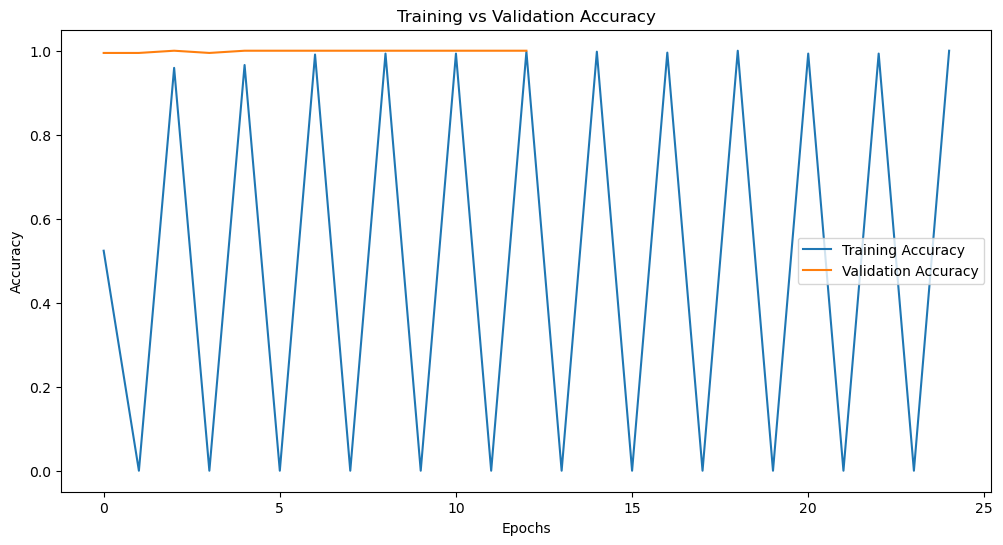

In [39]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

train_dir = r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\outputDL\train"
test_dir = r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\outputDL\test"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=180,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=180,
    class_mode='binary'
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

model.save("binary_classifier_transfer_learning.h5")

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now we can observe that by the 10th epoch, the accuracy goes up to 0.99. While the fluctuation in accuracy persists, this is a sign that the model is too complex for the data. Which is expected. I can increase the size of the data, but for that I would need a lot more space in my hard disk. I trust my test predictions will be better this time because the base model is very powerful.

In [41]:
model = load_model("binary_classifier_transfer_learning.h5")

new_images = [
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower1.jpg",  
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower2.jpg",
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower3.jpg",
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar1.jpg",    
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar2.jpg",
    r"C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar3.jpg"
]

for img_path in new_images:
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_label = "flowers" if prediction >= 0.5 else "cars"
    print(f"Image: {img_path} - Predicted Class: {class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower1.jpg - Predicted Class: flowers
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower2.jpg - Predicted Class: flowers
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseenflower3.jpg - Predicted Class: flowers
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar1.jpg - Predicted Class: cars
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Image: C:\Users\Abdullah\OneDrive - Habib University\my computer\ab\1.Habib\sem 7\Courses\Data Science\HW11\unseen_images\unseencar2.jpg - Predicte

The predictions are perfectly accurate now.